In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy
import pylab
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential

#Библиотеки для stacking
from vecstack import stacking
#from pystacknet.pystacknet import StackNetRegressor #проблема с установкой
from mlxtend.regressor import StackingCVRegressor
from mlens.ensemble import SuperLearner
from sklearn.ensemble import StackingRegressor

%matplotlib inline

[MLENS] backend: threading


In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб/выбросы.xlsx', sheet_name = 0)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
0,12200000,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,-2.440808e+05,...,16 из 16,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
1,3672000,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,2.318041e+05,...,3 из 4,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN
2,4950000,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,6.435468e+05,...,1 из 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5890000,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,-5.405876e+05,...,3 из 6,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN
4,5390000,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,-2.658775e+05,...,10 из 23,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,1.794487e+06,...,13 из 20,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN
7540,6100000,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,6.981171e+05,...,3 из 5,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7541,9826880,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,1.804937e+06,...,8 из 11,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN
7542,4350000,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,-2.284562e+05,...,10 из 16,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN


In [3]:
df_ln_price = df['Цена'].apply(np.log)
df.insert(1, "LN(Цена)", df_ln_price)
df

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,16 из 16,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,3 из 4,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,1 из 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,3 из 6,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,10 из 23,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,13 из 20,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,3 из 5,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,8 из 11,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,10 из 16,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN


In [4]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

#Если вы используете scikit-learn версии ниже 1.0, вам необходимо использовать get_feature_names метод. 
#Для более новых версий scikit-learn get_feature_names_out будет работать нормально.

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Техника,Тёплый пол,Запланирован снос,Этаж_4_25 и более,Этаж_4_не важно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,"холодильник, стиральная машина, посудомоечная...",есть,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,"кондиционер, холодильник, посудомоечная машина",NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Этаж_4_не важно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи 11-25,Этаж_4_этажи 2-5,Этаж_4_этажи 6-10,Ремонт_дизайнерский,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_центр_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Ремонт_евро,Ремонт_стандартный,Ремонт_требует ремонта,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_метро_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Раст_центр_2_более 10000,Раст_центр_2_до 500,Раст_центр_2_от 1000 до 1500,Раст_центр_2_от 1500 до 3000,Раст_центр_2_от 3000 до 5000,Раст_центр_2_от 500 до 1000,Раст_центр_2_от 5000 до 10000,Раст_метро_2_на удалении от метро,Раст_метро_2_не выжно,Раст_метро_2_рядом с метро
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Район_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Район_2_УНЦ,Район_2_Уктус,Район_2_Уралмаш,Район_2_Химмаш,Район_2_Центр,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Многоуровневая_En'] = encoder.fit_transform(df[['Многоуровневая']])
df['Терраса_En'] = encoder.fit_transform(df[['Терраса']])
df['ЖК_En'] = encoder.fit_transform(df[['ЖК']])
df['Вид_En'] = encoder.fit_transform(df[['Вид']])
df

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y 

,Цена,LN(Цена),Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,...,Район_2_Центр,Район_2_Центральный,Район_2_Шарташ,Район_2_Эльмаш,Район_2_Юго-Западный,Район_2_Южный,Многоуровневая_En,Терраса_En,ЖК_En,Вид_En
0,12200000,16.316947,1.244408e+07,12741835.0,1.307682e+07,1.283019e+07,1.259296e+07,10.032591,0,2662.039991,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,1
1,3672000,15.116247,3.440196e+06,3788324.5,3.860409e+06,3.441493e+06,3.614260e+06,9.063572,0,-6012.449904,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
2,4950000,15.414898,4.306453e+06,4349611.0,4.360099e+06,4.266249e+06,4.328032e+06,9.062723,0,22922.841278,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
3,5890000,15.588767,6.430588e+06,6356236.0,6.769846e+06,6.392300e+06,6.393412e+06,9.033269,0,3774.725466,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
4,5390000,15.500056,5.655877e+06,5661739.5,5.624131e+06,5.572903e+06,5.658808e+06,10.424938,0,-30742.074763,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,16.694709,1.600551e+07,17103258.0,1.725586e+07,1.705123e+07,1.655439e+07,10.303444,0,894.780267,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
7540,6100000,15.623799,5.401883e+06,5682841.5,5.683466e+06,5.534101e+06,5.542362e+06,8.972290,0,-6026.088792,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
7541,9826880,16.100632,8.021943e+06,8694407.0,8.440710e+06,8.355624e+06,8.358175e+06,10.164845,0,-1919.172274,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
7542,4350000,15.285686,4.578456e+06,4197503.5,4.196797e+06,4.620189e+06,4.387980e+06,10.062153,0,-15178.908880,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1


In [10]:
list(df.columns)

['Цена',
 'LN(Цена)',
 'Прогноз_catb',
 'Прогноз_NN',
 'Прогноз_MLP',
 'Прогноз_Stack',
 'Mean_catb_NN',
 'Балл_2',
 'Метка',
 'err',
 'MAE',
 'MAPE',
 'Цена(кв.м)_pred',
 'Цена(кв.м)',
 'Интервал_цены(кв.м)',
 'Интервал_цены',
 'Комнатность_1',
 'Комнатность_2',
 'ОПлощадь',
 'КПлощадь_1',
 'КПлощадь_2',
 'КПлощадь_д',
 'КПлощадь_д_1',
 'ЖПлощадь_1',
 'ЖПлощадь_2',
 'ЖПлощадь_д',
 'ЖПлощадь_catb',
 'ЖПлощадь_д_catb',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этажность_1',
 'Этажность_2',
 'ГП_1',
 'ГП_2',
 'ГП_3',
 'ХВ',
 'Санузел_1',
 'Санузел_2',
 'Санузел_3',
 'Санузел_catc',
 'Ремонт',
 'Ремонт_2',
 'Материал_1',
 'Материал_2',
 'Многоуровневая',
 'Терраса',
 'Долгота',
 'Широта',
 'Координаты',
 'Количество',
 'Раст_центр_1',
 'Раст_центр_2',
 'Раст_метро_1',
 'Раст_метро_2',
 'Район_1',
 'Район_2',
 'ЖК',
 'Вид',
 'IsolationForest',
 'pca',
 'knn',
 'Манхэттенское',
 'Евклидово',
 'Чебышева',
 'AutoEncoder',
 'AutoEncoder_scores',
 'Выбросы_1',
 'Выбросы_2',
 'Выбросы_3',
 '

In [11]:
X = df[[
        'ОПлощадь',
        'Этажность_1',
        'ГП_3',
        'Этаж_4_25 и более',
        'Этаж_4_не важно',
        'Этаж_4_первый',
        'Этаж_4_последний',
        'Этаж_4_этажи 11-25',
        'Этаж_4_этажи 2-5',
        'Этаж_4_этажи 6-10',
        'Ремонт_дизайнерский',
        'Ремонт_евро',
        'Ремонт_стандартный',
        'Ремонт_требует ремонта',
        'Раст_центр_2_более 10000',
        'Раст_центр_2_до 500',
        'Раст_центр_2_от 1000 до 1500',
        'Раст_центр_2_от 1500 до 3000',
        'Раст_центр_2_от 3000 до 5000',
        'Раст_центр_2_от 500 до 1000',
        'Раст_центр_2_от 5000 до 10000',
        'Раст_метро_2_на удалении от метро',
        'Раст_метро_2_не выжно',
        'Раст_метро_2_рядом с метро',
        'Район_2_Академический',
        'Район_2_Большеконный',
        'Район_2_Ботанический',
        'Район_2_ВИЗ',
        'Район_2_Вокзальный',
        'Район_2_Волгоградский',
        'Район_2_Вторчермет',
        'Район_2_Втузгородок',
        'Район_2_Елизавет',
        'Район_2_Заречный',
        'Район_2_Звездочка',
        'Район_2_Зеленая Роща',
        'Район_2_Зеленая горка',
        'Район_2_Изоплит',
        'Район_2_Калиновский',
        'Район_2_Клевер Парк',
        'Район_2_Кольцово',
        'Район_2_Компрессорный',
        'Район_2_Комсомольский_1',
        'Район_2_Комсомольский_2',
        'Район_2_Космонавтов',
        'Район_2_Лечебный',
        'Район_2_Новая сортировка',
        'Район_2_Парковой',
        'Район_2_Первомайский',
        'Район_2_Пионерский',
        'Район_2_Птицефабрика',
        'Район_2_Рудный',
        'Район_2_Сибирский',
        'Район_2_Синие Камни',
        'Район_2_Солнечный',
        'Район_2_Старая сортировка',
        'Район_2_УНЦ',
        'Район_2_Уктус',
        'Район_2_Уралмаш',
        'Район_2_Химмаш',
        'Район_2_Центр',
        'Район_2_Центральный',
        'Район_2_Шарташ',
        'Район_2_Эльмаш',
        'Район_2_Юго-Западный',
        'Район_2_Южный',
        'Многоуровневая_En',
        'Терраса_En',
        'ЖК_En',
        'Вид_En'
      ]]

Y = df['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [608130.18389235]
    fold  1:  [605220.80190829]
    fold  2:  [631010.45021541]
    ----
    MEAN:     [614787.14533868] + [11532.93376162]
    FULL:     [614786.10713509]

model  1:     [Pipeline]
    fold  0:  [675948.98272577]
    fold  1:  [730362.92177753]
    fold  2:  [679440.13275261]
    ----
    MEAN:     [695250.67908530] + [24868.97963710]
    FULL:     [695247.66883946]

model  2:     [XGBRegressor]
    fold  0:  [626940.53110384]
    fold  1:  [646427.41939635]
    fold  2:  [655356.29778896]
    ----
    MEAN:     [642908.08276305] + [11864.60413245]
    FULL:     [642905.59250234]

model  3:     [LGBMRegressor]
    fold  0:  [622787.72919035]
    fold  1:  [633249.01663930]
    fold  2:  [668399.16373128]
    ----
    MEAN:     [641478.63652031] + [19508.89921309]
    FULL:     [641475.72153164]

model  4:     [

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


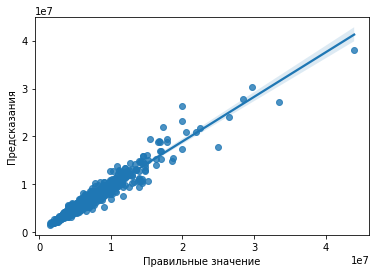

In [12]:
models = [CatBoostRegressor(iterations = 2500, 
                            random_seed = 5, 
                            learning_rate = 0.03, #0,008
                            one_hot_max_size = 45, #нет
                            max_depth = 4, #5
                            verbose = 0),
          make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                       activation = 'relu', 
                                                       solver = 'adam', 
                                                       alpha = 2, 
                                                       max_iter = 5000)),
          XGBRegressor(),
          LGBMRegressor(),
          DecisionTreeRegressor()]
        
S_train, S_test = stacking(models, 
                           X_train, 
                           Y_train, 
                           X_test, 
                           regression = True, 
                           metric = mae, 
                           n_folds = 3,
                           shuffle = True, 
                           random_state = 0, 
                           verbose = 2)

#можно попробовать NN
reg = LinearRegression()
reg = reg.fit(S_train, Y_train)

#preds = clf.predict(S_test)
#plt_sct(y_test,preds)

pred_train = reg.predict(S_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(Y_train, pred_train)), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print(f'Train R2 {r2_score(Y_train, pred_train):.4f}')
print("===============================")

pred_test = reg.predict(S_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(Y_test, pred_test)), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print(f'Test R2 {r2_score(Y_test, pred_test):.4f}')

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 607534.3921
RMSE на обучении: 1038953.279
MAPE на обучении: 0.0884
Train R2 0.9275
MAE на тесте: 535908.8931
RMSE на тесте: 893829.4086
MAPE на тесте: 0.0804
Test R2 0.9383

In [ ]:
#CV

In [14]:
X = df[[
        'ОПлощадь',
        'Этажность_1',
        'ГП_3',
        'Этаж_4_25 и более',
        'Этаж_4_не важно',
        'Этаж_4_первый',
        'Этаж_4_последний',
        'Этаж_4_этажи 11-25',
        'Этаж_4_этажи 2-5',
        'Этаж_4_этажи 6-10',
        'Ремонт_дизайнерский',
        'Ремонт_евро',
        'Ремонт_стандартный',
        'Ремонт_требует ремонта',
        'Раст_центр_2_более 10000',
        'Раст_центр_2_до 500',
        'Раст_центр_2_от 1000 до 1500',
        'Раст_центр_2_от 1500 до 3000',
        'Раст_центр_2_от 3000 до 5000',
        'Раст_центр_2_от 500 до 1000',
        'Раст_центр_2_от 5000 до 10000',
        'Раст_метро_2_на удалении от метро',
        'Раст_метро_2_не выжно',
        'Раст_метро_2_рядом с метро',
        'Район_2_Академический',
        'Район_2_Большеконный',
        'Район_2_Ботанический',
        'Район_2_ВИЗ',
        'Район_2_Вокзальный',
        'Район_2_Волгоградский',
        'Район_2_Вторчермет',
        'Район_2_Втузгородок',
        'Район_2_Елизавет',
        'Район_2_Заречный',
        'Район_2_Звездочка',
        'Район_2_Зеленая Роща',
        'Район_2_Зеленая горка',
        'Район_2_Изоплит',
        'Район_2_Калиновский',
        'Район_2_Клевер Парк',
        'Район_2_Кольцово',
        'Район_2_Компрессорный',
        'Район_2_Комсомольский_1',
        'Район_2_Комсомольский_2',
        'Район_2_Космонавтов',
        'Район_2_Лечебный',
        'Район_2_Новая сортировка',
        'Район_2_Парковой',
        'Район_2_Первомайский',
        'Район_2_Пионерский',
        'Район_2_Птицефабрика',
        'Район_2_Рудный',
        'Район_2_Сибирский',
        'Район_2_Синие Камни',
        'Район_2_Солнечный',
        'Район_2_Старая сортировка',
        'Район_2_УНЦ',
        'Район_2_Уктус',
        'Район_2_Уралмаш',
        'Район_2_Химмаш',
        'Район_2_Центр',
        'Район_2_Центральный',
        'Район_2_Шарташ',
        'Район_2_Эльмаш',
        'Район_2_Юго-Западный',
        'Район_2_Южный',
        'Многоуровневая_En',
        'Терраса_En',
        'ЖК_En',
        'Вид_En'
      ]]

Y = df['Цена']

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]
    
    models = [CatBoostRegressor(iterations = 2500, 
                                random_seed = 5, 
                                learning_rate = 0.03, #0,008
                                one_hot_max_size = 45, #нет
                                max_depth = 4, #5
                                verbose = 0),
              make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes = (256, 64, 32), 
                                                           activation = 'relu', 
                                                           solver = 'adam', 
                                                           alpha = 2, 
                                                           max_iter = 5000)),
              XGBRegressor(),
              LGBMRegressor(),
              DecisionTreeRegressor()]

    S_train, S_test = stacking(models, 
                               X_train, 
                               Y_train, 
                               X_test, 
                               regression = True, 
                               metric = mae, 
                               n_folds = 3,
                               shuffle = True, 
                               random_state = 0, 
                               verbose = 2)

    #можно попробовать NN
    reg = LinearRegression()
    reg = reg.fit(S_train, Y_train)

    pred_test = reg.predict(S_test)
    mse_test = mse(Y_test, pred_test)
    
    all_rmse.append(round(sqrt(mse(Y_test, pred_test)), 4))
    all_mae.append(round(mae(Y_test, pred_test), 4))
    all_mape.append(round(mape(Y_test, pred_test), 4))
    all_r2.append(r2_score(Y_test, pred_test))

Обработка процесса № 0
task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [608130.18389235]
    fold  1:  [605220.80190829]
    fold  2:  [631010.45021541]
    ----
    MEAN:     [614787.14533868] + [11532.93376162]
    FULL:     [614786.10713509]

model  1:     [Pipeline]
    fold  0:  [747487.01642026]
    fold  1:  [757258.20918978]
    fold  2:  [698246.19913582]
    ----
    MEAN:     [734330.47491529] + [25825.37861524]
    FULL:     [734332.52677766]

model  2:     [XGBRegressor]
    fold  0:  [626940.53110384]
    fold  1:  [646427.41939635]
    fold  2:  [655356.29778896]
    ----
    MEAN:     [642908.08276305] + [11864.60413245]
    FULL:     [642905.59250234]

model  3:     [LGBMRegressor]
    fold  0:  [622787.72919035]
    fold  1:  [633249.01663930]
    fold  2:  [668399.16373128]
    ----
    MEAN:     [641478.63652031] + [19508.89921309]
    FULL:     [641475.721

    fold  2:  [659603.75133730]
    ----
    MEAN:     [638429.00348171] + [21268.32081729]
    FULL:     [638430.23745142]

model  4:     [DecisionTreeRegressor]
    fold  0:  [899275.12223262]
    fold  1:  [836092.80385275]
    fold  2:  [974114.47437997]
    ----
    MEAN:     [903160.80015511] + [56414.06002921]
    FULL:     [903160.19415419]

Обработка процесса № 7
task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [CatBoostRegressor]
    fold  0:  [595292.25210465]
    fold  1:  [626650.79101194]
    fold  2:  [604964.97934984]
    ----
    MEAN:     [608969.34082214] + [13111.46250934]
    FULL:     [608967.20777649]

model  1:     [Pipeline]
    fold  0:  [666443.21585421]
    fold  1:  [719889.03414066]
    fold  2:  [759564.10151702]
    ----
    MEAN:     [715298.78383730] + [38154.75186695]
    FULL:     [715291.16444117]

model  2:     [XGBRegressor]
    fold  0:  [633689.68802619]
    fold  1:  [6

In [16]:
# массив оценок по k блокам
print('RMSE:', all_rmse)
print('MAE:', all_mae)
print('MAPE:', all_mape)
print('R2:', all_r2)

RMSE: [884241.8559, 1005790.5427, 1080402.1173, 1044716.4102, 913052.6617, 996842.0678, 1104883.4513, 1052364.25, 952670.1719, 850939.6546]
MAE: [530933.1426, 602919.9978, 620576.4513, 592290.3008, 570661.5224, 583926.5172, 632100.9528, 590633.3847, 581122.6597, 544637.6699]
MAPE: [0.0797, 0.0891, 0.0887, 0.0831, 0.0859, 0.0844, 0.0889, 0.0852, 0.087, 0.084]
R2: [0.9395801980268965, 0.9259419609701491, 0.917236222658986, 0.9344332283834261, 0.9467615649681648, 0.9282078555657743, 0.9204956210886884, 0.9314648337616294, 0.9327176752111306, 0.9450064161878668]


In [17]:
# среднее значение mae
print('RMSE_mean:', np.mean(all_rmse))
print('MAE_mean:', np.mean(all_mae))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

RMSE_mean: 988590.31834
MAE_mean: 584980.25992
MAPE_mean: 0.0856
R2_mean: 0.9321845576822712


In [ ]:
RMSE_mean: 1016922.8828714285
MAE_mean: 590673.9875142857
MAPE_mean: 0.08558571428571428
R2_mean: 0.9286958311114253